# Format Results

In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
retain_results = "workspace/FiLLM/results/knowundo-copyright/qwen2-1.5b_retain_knowundo-copyright_checkpoint-347_noLORA_1e-04_10_0.01_retention_unlearn_seed42.csv"
df_retain = pd.read_csv(retain_results)

full_results = "workspace/FiLLM/results/knowundo-copyright/qwen2-1.5b_full_knowundo-copyright_checkpoint-496_noLORA_1e-04_10_0.01_full_unlearn_seed42.csv"
df_full = pd.read_csv(full_results)
df_full['step'] = '0'

In [10]:
results_ = [
    # sept03_experiments/
    "performance_over_time_3e-05_all(-layers.1,layers.2)_grad-ascent",
    "performance_over_time_5e-05_all(-layers.1,layers.2)_grad-ascent",
    "performance_over_time_0,12,26_grad-ascent",
    "performance_over_time_0,12,26_grad-diff",
    "performance_over_time_k0.1_5e-05_mlp,attn_False",
    "performance_over_time_k0.1_5e-05_mlp,attn_True",
    "performance_over_time_k0.1_5e-05_mlp,attn_True2",
    "performance_over_time_k-0.1_5e-05_mlp,attn_False",
    "performance_over_time_k0.1_8e-05_mlp,attn_False",
    "performance_over_time_k0.1_5e-05_mlp_False",
    "performance_over_time_k0.1_5e-05_mlp,attn_False_sophia",
    "workspace/FiLLM/results/tofu/performance_over_time_k0.1_so-influence_5e-05_mlp,attn_False_sophia"
    #

]
r_idx = -1
results = f"results/sept03_experiments/{results_[r_idx]}"
results = "workspace/FiLLM/results/tofu/performance_over_time_k0.1_none_5e-05_mlp,attn_False_sophia"

files = os.listdir(results)
files = [f for f in files if re.match(r".*\.csv", f)]


# read all files
df = df_full
for f in files:
    pth = os.path.join(results, f)
    tmp = pd.read_csv(pth)
    # replace "Method" column with layer.#
    step_num = tmp['Method'].values[0].split("_")[1].split("-")[1]
    tmp['step'] = step_num
    df = pd.concat([df, tmp])
df = df.reset_index(drop=True)
df['step'] = df['step'].astype(int)
df = df.sort_values(by=['step'])
print(f"Number of rows: {len(df)}")
df.head()

Number of rows: 4


,ROUGE Real Authors,Prob. Real Authors,Truth Ratio Real Authors,ROUGE Real World,Prob. Real World,Truth Ratio Real World,ROUGE Retain,Prob. Retain,Truth Ratio Retain,ROUGE Forget,Prob. Forget,Truth Ratio Forget,Model Utility,Forget Quality,Method,Submitted By,step
0,0.716667,0.315765,0.347124,0.794872,0.399641,0.478798,0.806584,0.000000,0.000000,0.767704,0.000000,0.000000,0.770572,0.000000,qwen2-1.5b_full_knowundo-copyright_checkpoint-...,keenan,0
1,0.717333,0.353934,0.411428,0.706838,0.396285,0.485807,0.948345,0.952460,0.513263,0.708655,0.884980,0.451661,0.776544,0.028603,forget01_checkpoint-2_sophiag_grad-ascent_5e-0...,keenan,2
3,0.651667,0.353865,0.411377,0.675499,0.404165,0.492777,0.494205,0.682132,0.504120,0.401488,0.246968,0.556108,0.595431,0.918805,forget01_checkpoint-4_sophiag_grad-ascent_5e-0...,keenan,4
2,0.456333,0.331636,0.396756,0.612821,0.374797,0.443095,0.342819,0.204316,0.460081,0.274426,0.055156,0.573617,0.445092,0.918805,forget01_checkpoint-6_sophiag_grad-ascent_5e-0...,keenan,6


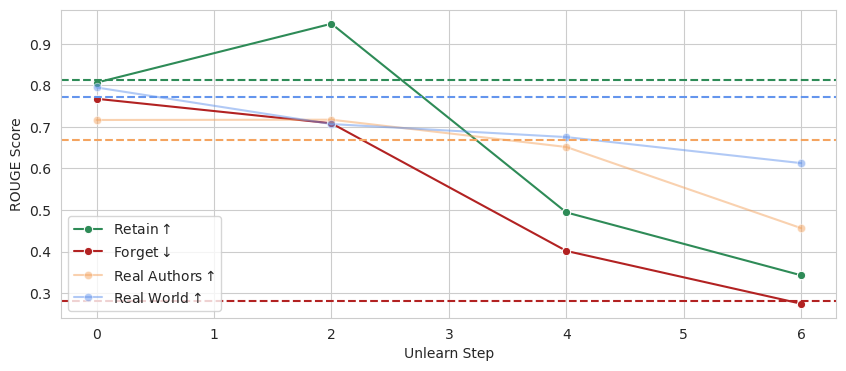

In [11]:
# plot each layer on the x axis and both the retain rouge and forget rouge on the y axis
sns.set_style(style="whitegrid")

fig, ax = plt.subplots(figsize=(10, 4))

sns.lineplot(x="step", y="ROUGE Retain", data=df, ax=ax, marker="o", label="Retain$\\uparrow$", c="seagreen", alpha=1)
sns.lineplot(x="step", y="ROUGE Forget", data=df, ax=ax, marker="o", label="Forget$\\downarrow$", c="firebrick", alpha=1)
sns.lineplot(x="step", y="ROUGE Real Authors", data=df, ax=ax, marker="o", label="Real Authors$\\uparrow$", c="sandybrown", alpha=0.5)
sns.lineplot(x="step", y="ROUGE Real World", data=df, ax=ax, marker="o", label="Real World$\\uparrow$", c="cornflowerblue", alpha=0.5)

# plot horizontal line for retain rouge and forget rouge
plt.axhline(y=df_retain['ROUGE Retain'].values[0], color='seagreen', linestyle='--')
plt.axhline(y=df_retain['ROUGE Forget'].values[0], color='firebrick', linestyle='--')
plt.axhline(y=df_retain['ROUGE Real Authors'].values[0], color='sandybrown', linestyle='--')
plt.axhline(y=df_retain['ROUGE Real World'].values[0], color='cornflowerblue', linestyle='--')

#change x axis name
ax.set_xlabel("Unlearn Step")
ax.set_ylabel("ROUGE Score")

# ax.get_legend().remove()

plt.show()

# save figure as svg
# fig.savefig(f"figures/{results_[r_idx]}.svg", format="svg")